In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

# Task 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [4]:
clf = DecisionTreeClassifier()
cross_val_score(clf,X,y, cv=10).mean()

0.8343366328147548

# Task 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - ответ в пункте 2. 

In [5]:
cross_val_score(BaggingClassifier(clf,n_estimators = 100),X,y, cv=10).mean()

0.9232030202526482

# Task 3

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [6]:
n_features = int(np.sqrt(X.shape[1]))
cross_val_score(BaggingClassifier(clf, n_estimators=100, max_features=n_features), X, y, cv=10).mean()

0.9309682448295467

# Task 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [7]:
clf_4 = DecisionTreeClassifier(max_features=n_features)
cross_val_score(BaggingClassifier(clf_4,n_estimators = 100),X,y, cv=10).mean()

0.9505642880982406

# Task 5

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера :

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [54]:
answ_5 = [2,3,4,7]

In [20]:
n_trees = []
cv_scores = []

for i in range(5,105,5):
    n_trees.append(i)
    clf_RF = RandomForestClassifier(n_estimators = i)
    cv_scores.append(cross_val_score(clf_RF,X,y, cv=10).mean())

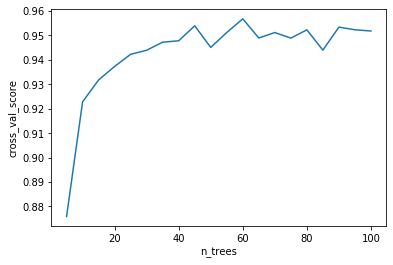

In [24]:
plt.plot(n_trees, cv_scores)
plt.xlabel('n_trees')
plt.ylabel('cross_val_score')
plt.show()

In [26]:
max_depth = []
cv_scores = []

for i in range(1,20,1):
    max_depth.append(i)
    clf_RF = RandomForestClassifier(n_estimators = 10,max_depth = i)
    cv_scores.append(cross_val_score(clf_RF,X,y, cv=10).mean())

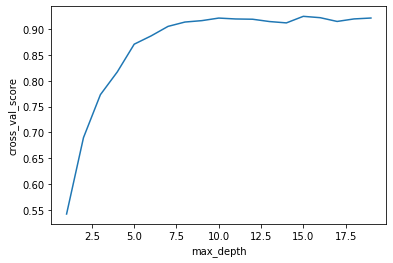

In [27]:
plt.plot(max_depth, cv_scores)
plt.xlabel('max_depth')
plt.ylabel('cross_val_score')
plt.show()

In [52]:
max_features = []
cv_scores = []

for i in range(5,X.shape[1],5):
    max_features.append(i)
    clf_RF = RandomForestClassifier(n_estimators = 10, max_features = i)
    cv_scores.append(cross_val_score(clf_RF,X,y, cv=10).mean())

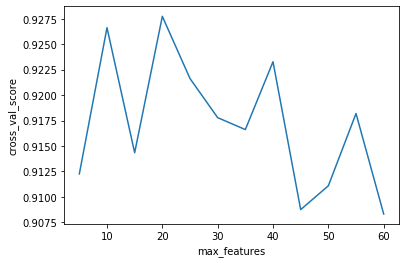

In [53]:
plt.plot(max_features, cv_scores)
plt.xlabel('max_features')
plt.ylabel('cross_val_score')
plt.show()